In this blog post, I am sharing my experience in solving a Machine Learning project on predicting survivors from the Titanic disastor by Kaggle.The Titanic shipwreck is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes such as age, sex, cabin class etc. This was a great project for me to start as the data is fairly clean and the calculations are relatively simple. 

View the project here: [_Titanic: Machine Learning from Disaster Start here! Predict survival on the Titanic and get familiar with ML basics_](https://www.kaggle.com/c/titanic)

![](https://s-media-cache-ak0.pinimg.com/originals/76/ab/d9/76abd9aa85d89cd53c5297129ea57cee.jpg)

My project has following parts
* [Understanding the data](#load-and-understand-data)
* [Feature engineering](#feature-engineering)
    * [Missing value imputation](#fix-missing-data)
    * [Data Visualization](#data-visualization)
* [Prediction!](#prediction)
* [Kaggle Submission](#kaggle-submission)

## Load and understand data

**The data for the passengers is contained in two files and each row in both data sets represents a passenger on the Titanic.** 

* train.csv: Contains data on 712 passengers
* test.csv: Contains data on 418 passengers

**Each column represents one feature.**

- PassengerId -- A numerical id assigned to each passenger.
- Pclass -- The class the passenger was in.
- Name -- the name of the passenger.
- Sex -- The gender of the passenger -- male or female.
- Age -- The age of the passenger. Fractional.
- SibSp -- The number of siblings and spouses the passenger had on board.
- Parch -- The number of parents and children the passenger had on board.
- Ticket -- The ticket number of the passenger.
- Fare -- How much the passenger paid for the ticker.
- Cabin -- Which cabin the passenger was in.
- Embarked -- Where the passenger boarded the Titanic.

**The training data additionally contain a column 'Survived', which is what we want to predict for our test data.**
- Survived -- Whether the passenger survived (1), or didn't (0).

In [83]:
# Imports
# pandas and numpy
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [84]:
# Loading data and printing first few rows
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Previewing the statistics of training data and test data
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


# Feature Engineering

Feature engineering is the process of using our knowledge of the data to create features that make machine learning algorithms work. And as per Coursera founder and Machine Learning Professor, Andrew Ng, 

> Coming up with features is difficult, time-consuming, requires expert knowledge. 
> "Applied machine learning" is basically feature engineering. 


In [85]:
# print the names of the columns in the data frame
print("In Training Data missing, columns with missing values:")
# Retain columns that are of interest and discard the rest (such as Id, Name, Cabin, and Ticket number)
newcols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked']
train = train[newcols]
# Check which columns have missing data
for column in train.columns:
    if np.any(pd.isnull(train[column])) == True:
        print(column)  

In Training Data missing, columns with missing values:
Age
Embarked


In [86]:
# print the names of the columns in the data frame
print("In test Data missing, columns with missing values:")
# Retain columns that are of interest and discard the rest (\Name, Cabin and Ticket number)
newcols = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
test = test[newcols]
# Check which columns have missing data
for column in test.columns:
    if np.any(pd.isnull(test[column])) == True:
        print(column)

In test Data missing, columns with missing values:
Age
Fare


## Fix Missing Data

Now that we have broadly peeked into data. Time to fix the columns with missing data. The missing data are in columns Age, Embarked and Cabin so lets figure out of fix these. 

* Age in training data: for age it makes sense to simply fill the data by median age.
* Embarked in training data: For embarked there are multiple choices (I used the simpler option1, but there are many Notebooks that describe option2 on Kaggle:
    1. Fill it using the most frequent option 'S'.
    2. Use the fare as the fare price might be dependent on the port embarked.
* Age in test data: I filled it using median of training data
* Fare in test data: I filled it using median of training data

In [87]:
# Filling missing age data with median values
train["Age"] = train["Age"].fillna(train["Age"].median())

# data cleaning for Embarked
print (train["Embarked"].unique())
print (train.Embarked.value_counts())
train["Embarked"] = train["Embarked"].fillna('S')

['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [88]:
# Filling missing age data with median values of trainging set
test["Age"] = test["Age"].fillna(train["Age"].median())

# filling fare data with median of training set
test["Fare"] = test["Fare"].fillna(train["Fare"].median())

## Creating New Features
Parch is the abbreviation of 'parent/children' and represent the sum of parents and children.
SibSp is the abbreviation of 'sibling/spouse' and represent the sum of brothers/sisters/wife/husband.
This said, we can compute the family size as the sum of the two above + 1

In [89]:
for df in [train, test]:
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

def filter_family_size(x):
    if x == 1:
        return 'Solo'
    elif x < 4:
        return 'Small'
    else:
        return 'Big'

for df in [train, test]:
    df['FamilySize'] = df['FamilySize'].apply(filter_family_size)

## Visualizing Features
For most of my plots, I have used [Seaborn](https://seaborn.pydata.org/introduction.html#introduction) which is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [90]:
# matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
plt.rcParams.update({'font.size': 22})

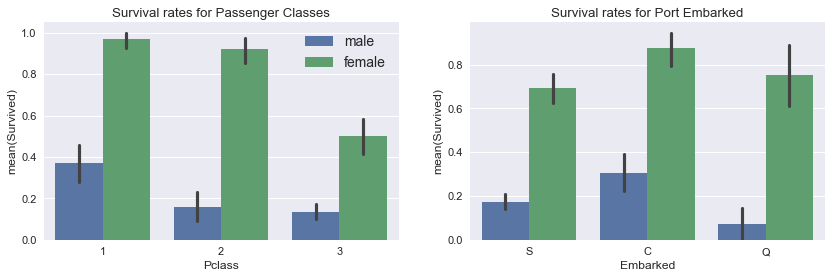

In [99]:
# Check with Pclass and Embarked
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.set_title('Survival rates for Passenger Classes')
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, ax=ax1)

ax2.set_title('Survival rates for Port Embarked')
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train, ax=ax2)
sns.despine()
sns.set(font_scale=1.4)
ax2.legend_.remove()
ax1.legend(loc='upper right')
plt.show()

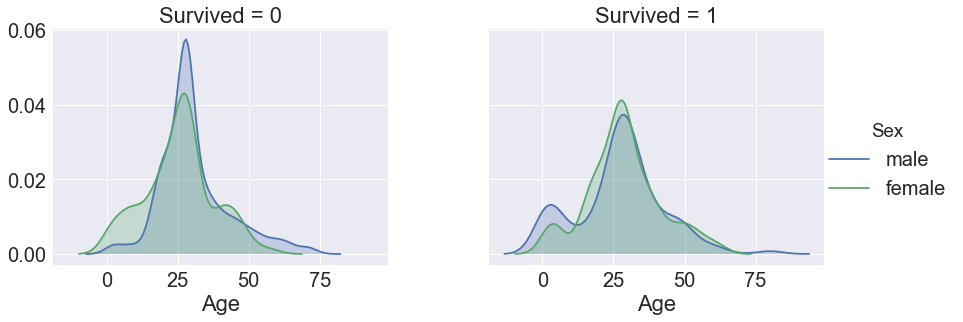

In [94]:
# Check with Age
g = sns.FacetGrid(train, col="Survived", hue='Sex', size=5, aspect = 1.2)
g.map(sns.kdeplot, "Age", shade=True).add_legend().fig.subplots_adjust(wspace=.3)
sns.despine()
sns.set(font_scale=2)
plt.show()

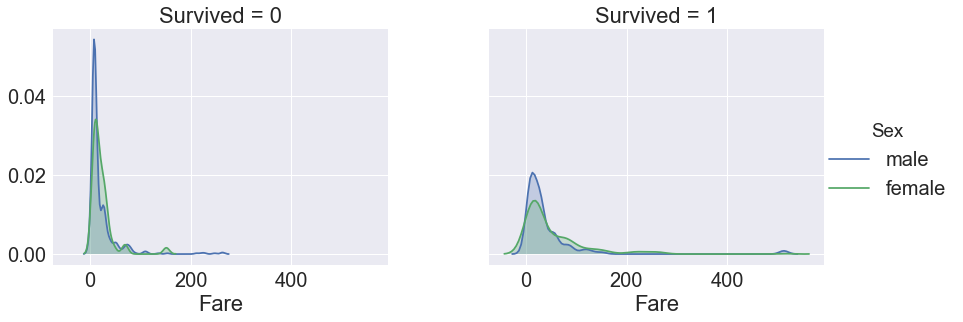

In [93]:
# Check with Fare
g = sns.FacetGrid(train, col="Survived", hue='Sex', size=5, aspect = 1.2)
g.map(sns.kdeplot, "Fare", shade=True).add_legend().fig.subplots_adjust(wspace=.3)
sns.set(font_scale=2)
sns.despine()
plt.show()

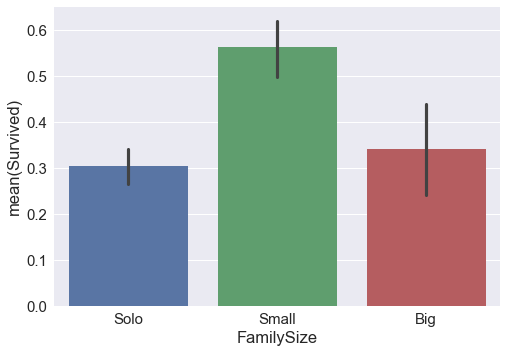

In [108]:
# Family Size
sns.barplot(x='FamilySize', y='Survived' , data=train, order = ['Solo', 'Small', 'Big'])
sns.set(font_scale=1.5)
plt.show()

** Key Observations**
- Passenger Class (pclass): Lets start with Passenger Class, Here I have plotted factors survived as a function of passenger class. This seems like a no-brainer, passengers in better classes were certainly evacuated first. There is near linear correlation!

- Sex of passenger: Again there is a strong correlation between the sex and survival.
- PClass: 
- Fare: It doesnt have any striking correlation with survival frequency.
- Family Size: 

# Train a model: Logistic Regression

For our titanic dataset, our prediction is a binary variable, which is discontinuous. So using a logistic regression model makes more sense than using a linear regression model. So in the following snippet I have used python library to perform logistic regression using the featured defined in predictors.

In [76]:
# Convert to numeric values
train.loc[train["Embarked"] == 'S', "Embarked"] = 0
train.loc[train["Embarked"] == 'C', "Embarked"] = 1
train.loc[train["Embarked"] == 'Q', "Embarked"] = 2

test.loc[test["Embarked"] == 'S', "Embarked"] = 0
test.loc[test["Embarked"] == 'C', "Embarked"] = 1
test.loc[test["Embarked"] == 'Q', "Embarked"] = 2

In [77]:
# convert female/male to numeric values (male=0, female=1)
train.loc[train["Sex"]=="male","Sex"]=0
train.loc[train["Sex"]=="female","Sex"]=1

test.loc[test["Sex"]=="male","Sex"]=0
test.loc[test["Sex"]=="female","Sex"]=1

In [78]:
# convert family size to numeric values

train.loc[train["FamilySize"] == 'Solo', "FamilySize"] = 0
train.loc[train["FamilySize"] == 'Small', "FamilySize"] = 1
train.loc[train["FamilySize"] == 'Big', "FamilySize"] = 2

test.loc[test["FamilySize"] == 'Solo', "FamilySize"] = 0
test.loc[test["FamilySize"] == 'Small', "FamilySize"] = 1
test.loc[test["FamilySize"] == 'Big', "FamilySize"] = 2

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

# columns we'll use to predict outcome
features = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']
label = 'Survived'

# instantiate the model
logreg = LogisticRegression()

# perform cross-validation
print(cross_val_score(logreg, train[features], train[label], cv=10, scoring='accuracy').mean())

0.798010157757


# Kaggle Submission

Now we need to run our prediction on the test data set and Submit to Kaggle.



In [80]:
# Apply our prediction to test data
logreg.fit(train[features], train[label])
prediction = logreg.predict(test[features])

In [81]:
# Create a new dataframe with only the columns Kaggle wants from the dataset
submission_DF = pd.DataFrame({ 
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
    })
print(submission_DF.head(5))

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [82]:
# prepare file for submission
submission_DF.to_csv("submission.csv", index=False)